# Regressão linear 1: equações normais


Dado o dataset $(\mathbf{x}_{1}, y_{1}), \dots ,(\mathbf{x}_{N}, y_{N})$ onde $\mathbf{x}_i \in \mathbb{R}^{d}$ e $y_i \in \mathbb{R}$, podemos aproximar a função desconhecida $f:\mathbb{R}^{d} \rightarrow \mathbb{R}$ (lembrando que $y_i =f(\mathbf{x}_i)$) por meio de um modelo linear $h$:
$$
h(\mathbf{x}_{i}; \mathbf{w}, b) = \mathbf{w}^\top  \mathbf{x}_{i} + b
$$

Note que $h(\mathbf{x}_{i}; \mathbf{w}, b)$ é na verdade uma [transformação afim](https://en.wikipedia.org/wiki/Affine_transformation) de $\mathbf{x}_{i}$. Como em outros lugares, vamos usar o termo "linear" também para caracterizar uma transformação afim.

A saída de $h$ é uma transformação linear de $\mathbf{x}_{i}$. Usamos a notação $h(\mathbf{x}_{i}; \mathbf{w}, b)$ para deixar claro que $h$ é um modelo parametrizado, i.e., a transformação $h$ é definida pelos parâmetros $\mathbf{w}$ e $b$. Podemos pensar no vetor $\mathbf{w}$ como um vetor de *pesos* controlando o efeito de cada *feature* na predição.

Adicionando uma feature a mais na obsevação $\mathbf{x}_{i}$ (com o valor 1) -- coordenada artificial -- podemos simplificar a notação do modelo:

$$
h(\mathbf{x}_{i}; \mathbf{w}) = \hat{y}_{i} = \mathbf{w}^\top  \mathbf{x}_{i}
$$

Procuramos os melhores parâmetros $\mathbf{w}$ de modo que a predição $\hat{y}_{i}$ seja a mais próxima de $y_{i}$ de acordo com alguma métrica de erro. Usando o *erro quadrárico médio* como tal métrica podemos obter a seguinte função de custo:

\begin{equation}
J(\mathbf{w}) = \frac{1}{N}\sum_{i=1}^{N}(\hat{y}_{i} - y_{i})^{2}
\end{equation}

Desse modo, a tarefa de achar os parâmetros $\mathbf{w}$ se torna a tarefa de encontrar os valores de $\mathbf{w}$ para minimizar $J(\mathbf{w})$.

**Aqui vamos começar a explorar esse modelo olhando para um dataset bem simples**


In [1]:
# all imports
import numpy as np
import time
from util import get_housing_prices_data, r_squared
from plots import plot_points_regression 

%matplotlib inline

### O dataset

Os dados que vamos trabalhar vão ser dados artificiais. Vamos pegar 100 observações com apenas uma *feature* (metros quadrados de um imóvel) e com isso vamos associar um valor (o preço desse imóvel em $). Nossa tarefa é construir um modelo que consiga predizer o valor de imóveis.

In [2]:
X, y = get_housing_prices_data(N=100)


X shape = (100, 1)

y shape = (100, 1)

X:
mean 645.0, sdt 323.65, max 1200.0, min 90.0

y:
mean 44096.9140625, sdt 17317.29, max 82070.2109375, min 12810.3027344


### Plotando os dados

Acima temos algumas informações sobre os dados, podemos também visualizar cada ponto.

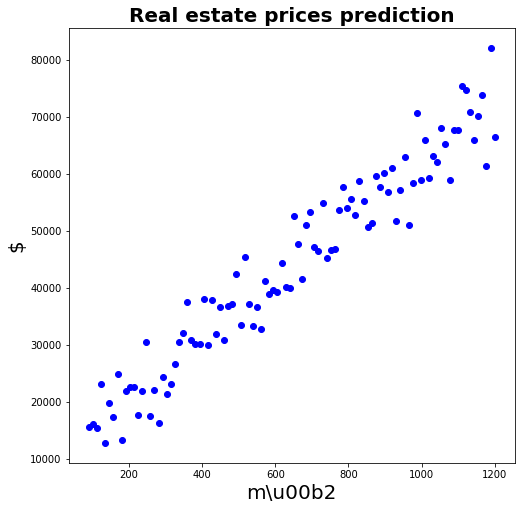

In [3]:
plot_points_regression(X,
                       y,
                       title='Real estate prices prediction',
                       xlabel="m\u00b2",
                       ylabel='$')

### Equações normais

Dados $f:\mathbb{R}^{n\times m} \rightarrow \mathbb{R}$ e $\mathbf{A} \in \mathbb{R}^{n\times m}$, definimos a derivada de $f$ com respeito a $\mathbf{A}$ como:

\begin{equation*}
\nabla_{\mathbf{A}}f =  \begin{bmatrix}
\frac{\partial f}{\partial \mathbf{A}_{1,1}} & \dots & \frac{\partial f}{\partial \mathbf{A}_{1,m}} \\
\vdots &  \ddots & \vdots \\
\frac{\partial f}{\partial \mathbf{A}_{n,1}} &  \dots & \frac{\partial f}{\partial \mathbf{A}_{n,m}}
\end{bmatrix}
\end{equation*}

Seja $\mathbf{X} \in \mathbb{R}^{N\times m}$ a matriz cujas linhas são as observações do dataset (também chamada de *design matrix*) e seja $\mathbf{y} \in \mathbb{R}^{N}$ o vetor contendo todos os valores de $y_{i}$ (i.e., $\mathbf{X}_{i,:} = \mathbf{x}_{i}$ e $\mathbf{y}_{i} =y_{i}$). É fácil checar que: 


\begin{equation}
J(\mathbf{w}) = \frac{1}{N}(\mathbf{X}\mathbf{w} - \mathbf{y})^{T}(\mathbf{X}\mathbf{w} - \mathbf{y})
\end{equation}


Usando certos conceitos básicos de derivada com matrizes podemos chegar no gradiente de $J(\mathbf{w})$ com respeito a $\mathbf{w}$

\begin{equation}
\nabla_{\mathbf{w}}J(\mathbf{w}) = \frac{2}{N} (\mathbf{X}^{T}\mathbf{X}\mathbf{w} -\mathbf{X}^{T}\mathbf{y})   
\end{equation}

Assim, quando $\nabla_{\mathbf{w}}J(\mathbf{w}) = 0$ temos que 

\begin{equation}
\mathbf{X}^{T}\mathbf{X}\mathbf{w} = \mathbf{X}^{T}\mathbf{y}
\end{equation}

Desse modo,

\begin{equation}
\mathbf{w} = (\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{X}^{T}\mathbf{y}
\end{equation}

A solução dada por essas equações são conhecidas como **equações normais**. Note que esse tipo de solução tem um custo, pois conforme cresce o número de variáveis, o tempo da inversão da matriz fica proibitivo. Vale a pena ler [esse material](http://cs229.stanford.edu/notes/cs229-notes1.pdf) para ver o argumento com mais detalhes.

### Exercício
Implemente a predição usando o método de equações normais. Usando apenas a biblioteca **numpy** você deve completar a função abaixo (uma introdução rápida a certas funcionalidades dessa biblioteca pode ser encontrada [aqui](http://cs231n.github.io/python-numpy-tutorial/)). Lembre que $\mathbf{X} \in \mathbb{R}^{N\times d}$, você precisa adicionar uma componente com apenas 1s a cada observação em $\mathbf{X}$ e realizar a computação descrita acima.

In [15]:
def normal_equation_prediction(X, y):
    """
    Calculates the prediction using the normal equation method.
    You should add a new row with 1s.

    :param X: design matrix
    :type X: np.ndarray(shape=(N, d))
    :param y: regression targets
    :type y: np.ndarray(shape=(N, 1))
    :return: prediction
    :rtype: np.ndarray(shape=(N, 1))
    """
    # YOUR CODE HERE:
    T = X.transpose();
    I = np.linalg.inv(np.matmul(T, X));
    prediction = np.matmul(
                    np.matmul(
                        I, 
                        T), 
                    y);
    # raise NotImplementedError
    # END YOUR CODE
    return prediction


ValueError: x and y must have same first dimension, but have shapes (1000000, 1) and (1, 1)

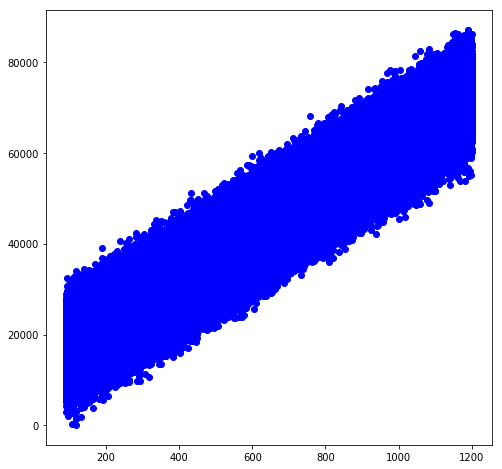

In [16]:
try:
    prediction = normal_equation_prediction(X, y)
    r_2 = r_squared(y, prediction)
    plot_points_regression(X,
                           y,
                           title='Real estate prices prediction',
                           xlabel="m\u00b2",
                           ylabel='$',
                           prediction=prediction,
                           legend=True,
                           r_squared=r_2)
except NotImplementedError:
    print("Falta fazer!")

Você pode usar a métrica [$R^2$](https://pt.wikipedia.org/wiki/R%C2%B2) para ver o quão bem o modelo linear está se ajustando aos dados.

**Nesse caso $R^2$ tem que estar próximo de $0.5$.**

In [17]:
try:
    X, y = get_housing_prices_data(N=1000000, verbose=False)
    init = time.time()
    prediction = normal_equation_prediction(X, y)
    init = time.time() - init
    print("Tempo de execução da função de predição = {:.8f}(s)".format(init))
    print("Tem que ser em menos de 1 segundo ")
    
except NotImplementedError:
    print("Falta fazer!")

Tempo de execução da função de predição = 0.00180006(s)
Tem que ser em menos de 1 segundo 
